In [1]:
from Group import Cluster_GPU as Cluster
import matplotlib.pyplot as plt
import torch
import random

In [2]:
num_clusters = 3
cluster = Cluster(num_clusters=num_clusters, 
    max_iter=30, 
    shift_threshold=1e-3, 
    device='cuda',
    debug=True
)

In [3]:
num_point = 300
batch = 5
test_tensor = torch.cat([
    torch.randn(batch, num_point//3, 2) + 4, 
    torch.randn(batch, num_point//3, 2) - 4, 
    torch.randn(batch, num_point//3, 2)],
    dim=1
)
test_tensor = test_tensor.cuda()
print(test_tensor.size())


torch.Size([5, 300, 2])


In [4]:
cluster_ids_stack, cluster_centers_stack = cluster(test_tensor)

Iter: 1 center_shift: 32.28633
Iter: 2 center_shift: 6.91954
Iter: 3 center_shift: 0.12403
Iter: 4 center_shift: 0.00000
Time cost: 0.025
Stopped for the center_shift!
Iter: 1 center_shift: 13.87646
Iter: 2 center_shift: 4.93253
Iter: 3 center_shift: 0.00000
Time cost: 0.008
Stopped for the center_shift!
Iter: 1 center_shift: 3.94572
Iter: 2 center_shift: 0.00000
Time cost: 0.006
Stopped for the center_shift!
Iter: 1 center_shift: 5.07124
Iter: 2 center_shift: 1.16594
Iter: 3 center_shift: 0.00000
Time cost: 0.008
Stopped for the center_shift!
Iter: 1 center_shift: 14.44800
Iter: 2 center_shift: 3.34260
Iter: 3 center_shift: 0.21062
Iter: 4 center_shift: 0.00000
Time cost: 0.011
Stopped for the center_shift!


(300, 2)
(300,)
(3,)


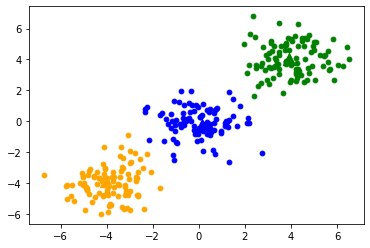

In [5]:
data = test_tensor[-1,:].cpu().numpy()
index = cluster_ids_stack[-1,:]
cluster_centers = cluster_centers_stack[-1,:]
print(data.shape)
print(index.shape)
print(cluster_centers.shape)
color = ['orange', 'b', 'g', 'r', 'm', 'y', 'k','c'] * num_clusters
for i in range(num_clusters):
    t_c = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    plt.scatter(data[index==i,0], data[index==i,1],marker='.',s=90,color=color[i])
    plt.scatter(data[int(cluster_centers[i]),0], data[int(cluster_centers[i]),1],marker='^',s=150,color=color[i])
plt.show()